<center>
    COMP4600/5300 - Reinforcement Learning

# Homework 5 - Temporal Difference

### Due: Wednesday, October 14th 11:59 pm
    
</center>

Student Name: Amin Majdi 

The purpose of this project is to study different properties of Temporal Difference methods.  

In [1]:
# You are allowed to use the following modules
import numpy as np
import matplotlib.pyplot as plt


## Part I
The following Windy Gridworld includes a crosswind running upward through the middle of the grid. The strength of wind is shown under each column that you should use for shifting. The goal is to reach the goal state G from the start state S. This is an undiscounted episodic task, with constant rewards of -1 until the goal state is reached.
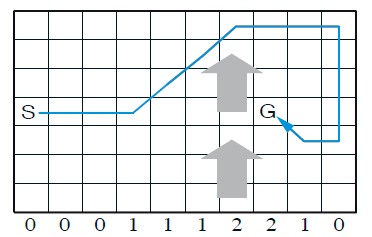


## Part I
Implement SARSA (on-policy TD control) using $\varepsilon$–greedy policy with parameters $\varepsilon=0.1, \alpha=0.5$, and $Q_0 (s,a)=0$ for all $s,a$. Apply your implementation to the windy gridworld in the following scenarios:


**(a)** In this scenario, the agent’s action set includes four moves (i.e. Up, Down, Right, Left). Plot the number of episodes vs. time steps (similar to graph in page 130). Then calculate the average episode length. 

**(b)** In this scenario, the agent has access to King’s moves (eight actions). You need to define a new action set and re-run the experiment in previous scenario. Plot the number of episodes vs. time steps. Then calculate the average episode length.

**(c)** In this scenario, you need to add a ninth action that causes no movement at all other than that caused by the wind. Plot the number of episodes vs. time steps. Then calculate the average episode length.

**(d)** In this scenario, the agent has access to King’s moves (eight actions). Assume that the effect of the wind, if there is any, is stochastic, sometimes varying by 1 from the mean values given for each column. That is, a third of the time you move exactly according to these values, as in the previous part, but also a third of the time you move one cell above that, and another third of the time you move one cell below that. For example, if you are one cell above the goal, one-third of the time you move two cells above the goal, and one-third of the time you move to the goal. Plot the number of episodes vs. time steps. Then calculate the average episode length.

**Note:** all four plots should be shown in one figure for comparison.



In [2]:
# Your code here
index_dictionary={
    0:[1,0],#right
    1:[0,1],#up
    2:[-1,0],#left
    3:[0,-1],#down
    4:[1,1],#up_right
    5:[-1,1],#up_left
    6:[-1,-1],#down_left
    7:[1,-1],#down_right
    8:[0,0]#stay
}
episode_num=1000
def SARSA(a,e,N_action,drift=False):#alpha and epsilon
        Q=[[[0  for depth_ in range(N_action)]for col_ in range(10)]for row_ in range(7)]
        episode=0
        wind=[0,0,0,1,1,1,2,2,1,0]
        
        time_step_mat=[0  for depth_ in range(episode_num)]
        
        while episode<episode_num:
            episode+=1
            state=[3,0]
            Goal_state=[3,7]
            state_row=state[0]
            state_col=state[1]
            if np.random.rand(1)> e:
                action_index=np.argmax(Q[state_row][state_col])
            else:
                action_index=np.random.choice(range(N_action))
            action=index_dictionary[action_index]
            search=True
            time_step=0
            while search==True:
                if drift==False:
                    wind_drift=wind[state[1]]
                else:
                    if wind[state[1]]==0:
                        wind_drift=wind[state[1]]
                    else:
                        wind_drift=wind[state[1]]+np.random.choice([-1,0,1])
                        
                new_state_row=state[0]+action[0]+wind_drift
                if new_state_row>6:
                    new_state_row=6
                if new_state_row<0:
                    new_state_row=0
                new_state_col=state[1]+action[1]
                if new_state_col>9:
                    new_state_col=9
                if new_state_col<0:
                    new_state_col=0                
                
                new_state= [new_state_row,new_state_col]
                reward =-1
                if np.random.rand(1)> e:
                    new_action_index=np.argmax(Q[new_state_row][new_state_col])
                else:
                    new_action_index=np.random.choice(range(N_action))
                new_action=index_dictionary[new_action_index]
                Q[state_row][state_col][action_index]=Q[state_row][state_col][action_index]+a*(reward+Q[new_state_row][new_state_col][new_action_index]-Q[state_row][state_col][action_index])
                state=new_state
                state_row=new_state_row
                state_col=new_state_col
                action_index=new_action_index
                action=new_action
                time_step+=1
                
                if state ==Goal_state:
                    time_step_mat[episode-1]=time_step
                    #print(state)
                    search=False
        return time_step_mat
    
part1=SARSA(0.5,0.1,4)
part2=SARSA(0.5,0.1,8)
part3=SARSA(0.5,0.1,9)
part4=SARSA(0.5,0.1,9,True)


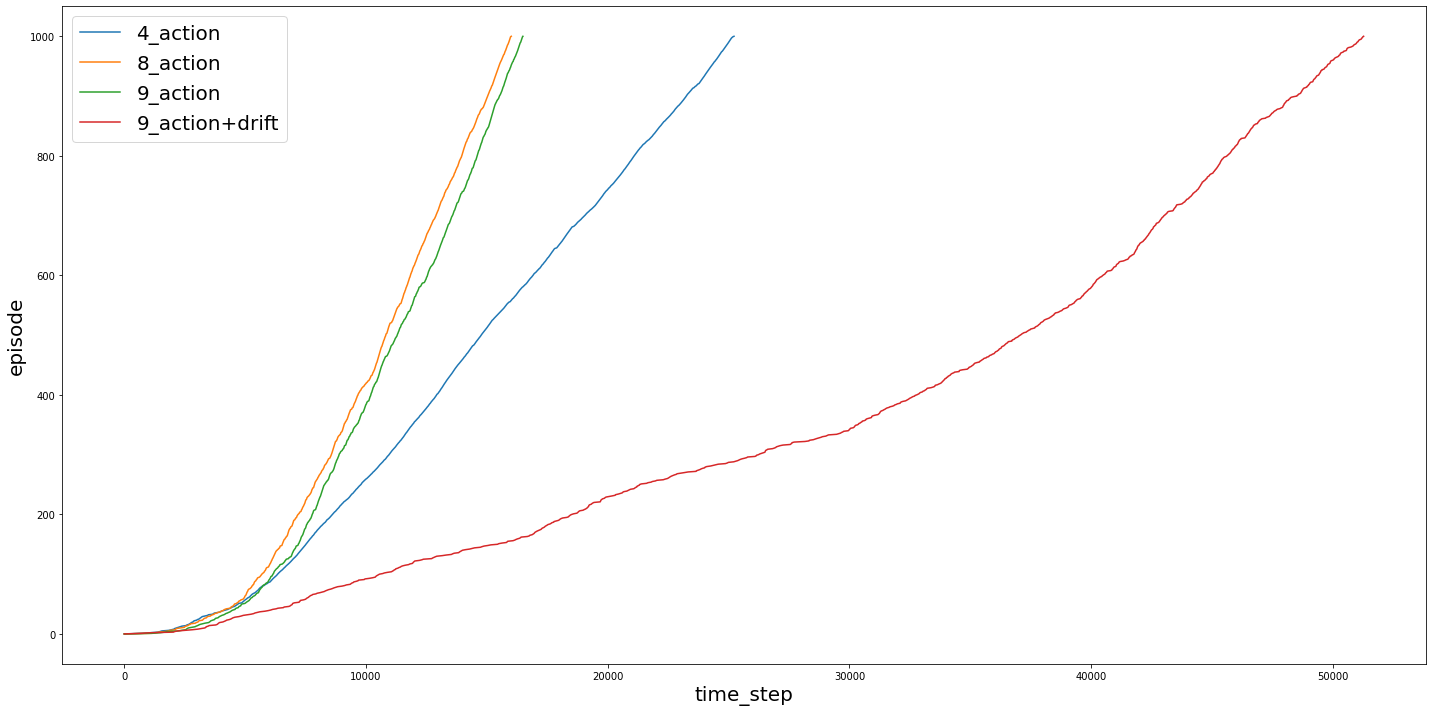

In [3]:
def acumulative_sum(a):
    sum_=[sum(a[0:x]) for x in range(len(a)+1)]
    return sum_

def average(a):
    list_=[0 for i in range(episode_num)]
    a=a[1:]
    for i in range(episode_num):
        list_[i]=a[i]/(i+1)
    return list_


    
plot1=acumulative_sum(part1)
plot2=acumulative_sum(part2)
plot3=acumulative_sum(part3)
plot4=acumulative_sum(part4)

average1=average(plot1)
average2=average(plot2)
average3=average(plot3)
average4=average(plot4)


fig=plt.figure(figsize=(20,10))

plt.xlabel("time_step",fontsize=20)
plt.ylabel("episode",fontsize=20)
plt.plot(plot1,range(episode_num+1),label='4_action')
plt.plot(plot2,range(episode_num+1),label='8_action')
plt.plot(plot3,range(episode_num+1),label='9_action')
plt.plot(plot4,range(episode_num+1),label='9_action+drift')

plt.legend(fontsize=20)
fig.tight_layout()

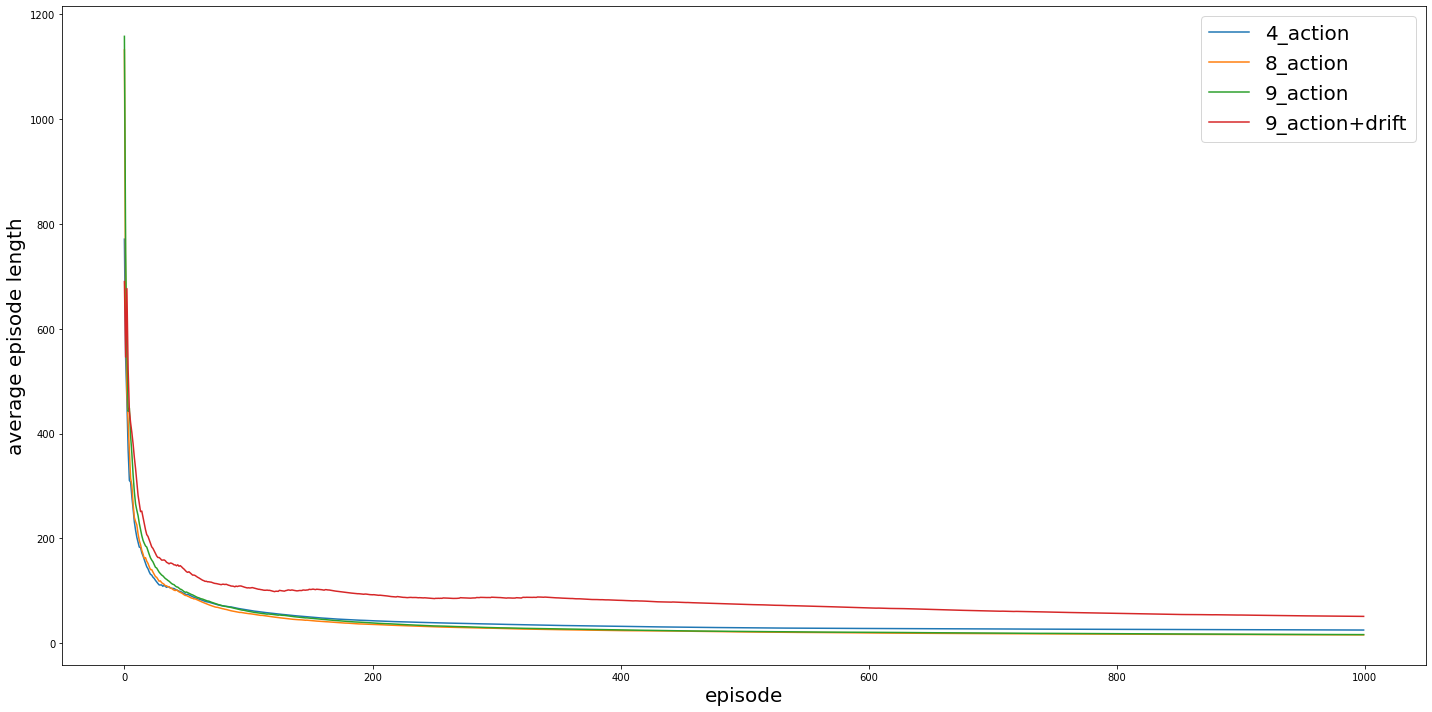

In [4]:
fig=plt.figure(figsize=(20,10))

plt.xlabel("episode",fontsize=20)
plt.ylabel("average episode length",fontsize=20)
plt.plot(average1,label='4_action')
plt.plot(average2,label='8_action')
plt.plot(average3,label='9_action')
plt.plot(average4,label='9_action+drift')

plt.legend(fontsize=20)
fig.tight_layout()

## Part II
Consider the following gridworld with four actions (up, down, right, and left). If the action takes the agent off the gird, the agent stays in the same state. In each non-terminating step, the agent receives a random reward of -12 or +10 with equal probability. The reward for reaching the goal state is +5 and the episode ends when the agent reaches the goal.

Use $\varepsilon$–greedy policy with $\varepsilon(s) = \frac{1}{\sqrt{n(s)}}$ where $n(s)$ is the number of times state $s$ has been visited, assuring infinite exploration in the limit which is a theoretical requirement for the convergence of both **Q-learning** and **Double Q-learning**. 
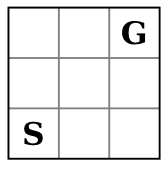

a. Implement **Q-learning** and **Double Q-learning** and apply them to this problem for 10,000 experiments using the learning rate $\alpha=\frac{1}{n(s,a)}$.

b. Plot the average reward per step vs. number of time steps averaged over 10,000 experiments. The length of an episode following the optimal policy is five actions, so the optimal average reward per step is +0.2. Plot this true value in your figure and see how close your algorithm gets to the true value.

c. Plot the maximal action value in the starting state $S$ (i.e. $max_a Q(s,a)$) averaged over 10,000 experiments. The optimal value of maximally valued action in the starting state is $5\gamma^4 - \sum_{k=0}^3 \approx 0.36$. Plot this true value in your figure and see how close your algorithm gets to the true value.

d. Repeat the experiments with $\alpha = \frac{1}{n(s,a)^{0.8}}$ and redo steps b and c.


**Note:** You should have four figures (average rewards and maximal action values for different learning rates, $2 \times 2$). 


In [5]:
index_dictionary={
    0:[1,0],#right
    1:[0,1],#up
    2:[-1,0],#left
    3:[0,-1],#down
}

In [6]:
episode_num=10000
def Q_learning(power):
        Q=[[[0  for depth_ in range(4)]for col_ in range(3)]for row_ in range(3)]
        n_s=[[0 for col_ in range(3)]for row_ in range(3)]
        n_s_a=[[[0  for depth_ in range(4)]for col_ in range(3)]for row_ in range(3)]        
        time_step_mat=[0  for depth_ in range(episode_num)]
        all_rewards=[]
        av_rev_st=[[0  for depth_ in range(2)]  for row_ in range(episode_num)]
        gamma=0.95
        all_time_steps=0
        Q_max_start_list=[]
        Q_max_start=[0 for depth_ in range(episode_num)]
        episode=0
        while episode<episode_num:
            episode+=1
            state=[0,0]
            Goal_state=[2,2]
            state_row=state[0]
            state_col=state[1]
            search=True
            time_step=1
            reward_list=[np.random.choice([-12,10])]
            while search==True:
                time_step+=1
                n_s[state_row][state_col]+=1
                e=1/np.sqrt(n_s[state_row][state_col])
                if np.random.rand(1)> e:
                    action_index=np.argmax(Q[state_row][state_col])
                else:
                    action_index=np.random.choice(range(4))
                
                action=index_dictionary[action_index]
                n_s_a[state_row][state_col][action_index]+=1
                new_state_row=state[0]+action[0]
                if new_state_row>2:
                    new_state_row=2
                if new_state_row<0:
                    new_state_row=0
                new_state_col=state[1]+action[1]
                if new_state_col>2:
                    new_state_col=2
                if new_state_col<0:
                    new_state_col=0
                new_state=[new_state_row,new_state_col]
                if new_state==Goal_state:
                    reward =5
                else:
                    reward =np.random.choice([-12,10])
                reward_list.append(reward)
                Q[state_row][state_col][action_index]=Q[state_row][state_col][action_index]+((1/np.power(n_s_a[state_row][state_col][action_index],power))*(reward+gamma*Q[new_state_row][new_state_col][np.argmax(Q[new_state_row][new_state_col])]-Q[state_row][state_col][action_index]))
                state=new_state
                state_row=new_state_row
                state_col=new_state_col
                
                #if time_step>=100:
                    #state =Goal_state
                if state ==Goal_state:
                    all_time_steps+=time_step
                    all_rewards.append(sum(reward_list))
                    av_rev_st[episode-1][0]=all_time_steps
                    av_rev_st[episode-1][1]=sum(all_rewards)/all_time_steps
                    Q_max_start_list.append(max(Q[0][0]))
                    Q_max_start[episode-1]=(np.sum(Q_max_start_list))/episode
                    search=False
        return av_rev_st , Q_max_start


In [7]:
def Double_Q_learning(power):
        Q_1=[[[0  for depth_ in range(4)]for col_ in range(3)]for row_ in range(3)]
        Q_2=[[[0  for depth_ in range(4)]for col_ in range(3)]for row_ in range(3)]
        n_s=[[0 for col_ in range(3)]for row_ in range(3)]
        n_s_a_1=[[[0  for depth_ in range(4)]for col_ in range(3)]for row_ in range(3)]
        n_s_a_2=[[[0  for depth_ in range(4)]for col_ in range(3)]for row_ in range(3)]
        time_step_mat=[0  for depth_ in range(episode_num)]
        all_rewards=[]
        av_rev_st=[[0  for depth_ in range(2)]  for row_ in range(episode_num)]
        gamma=0.95
        all_time_steps=0
        Q_max_start_list=[]
        Q_max_start=[0 for depth_ in range(episode_num)]
        episode=0
        while episode<episode_num:

            episode+=1
            state=[0,0] 
            Goal_state=[2,2]
            state_row=state[0]
            state_col=state[1]
            search=True
            time_step=1
            reward_list=[np.random.choice([-12,10])]
            while search==True:
                n_s[state_row][state_col]+=1
                e=1/np.sqrt(n_s[state_row][state_col])
                Q=[0 for depth_ in range(4)]
                for i in range(4):
                    Q[i]=Q_1[state_row][state_col][i]+Q_2[state_row][state_col][i]
                
                if np.random.rand(1)> e:
                    action_index=np.argmax(Q)
                else:
                    action_index=np.random.choice(range(4))
                action=index_dictionary[action_index]
                
                
                new_state_row=state[0]+action[0]
                if new_state_row>2:
                    new_state_row=2
                if new_state_row<0:
                    new_state_row=0
                new_state_col=state[1]+action[1]
                if new_state_col>2:
                    new_state_col=2
                if new_state_col<0:
                    new_state_col=0                
                
                new_state= [new_state_row,new_state_col]
                if new_state==Goal_state:
                    reward =5
                else:
                    reward =np.random.choice([-12,10])
                reward_list.append(reward)
                if np.random.choice([1,2]) == 1:
                    n_s_a_1[state_row][state_col][action_index]+=1
                    Q_1[state_row][state_col][action_index]=Q_1[state_row][state_col][action_index]+(1/np.power(n_s_a_1[state_row][state_col][action_index],power))*(reward+gamma*Q_2[new_state_row][new_state_col][np.argmax(Q_1[new_state_row][new_state_col])]-Q_1[state_row][state_col][action_index])
                else:
                    n_s_a_2[state_row][state_col][action_index]+=1
                    Q_2[state_row][state_col][action_index]=Q_2[state_row][state_col][action_index]+(1/np.power(n_s_a_2[state_row][state_col][action_index],power))*(reward+gamma*Q_1[new_state_row][new_state_col][np.argmax(Q_2[new_state_row][new_state_col])]-Q_2[state_row][state_col][action_index])

                state=new_state
                state_row=new_state_row
                state_col=new_state_col
                
                time_step+=1
                #if time_step>=100:
                    #state =Goal_state
                
                if state ==Goal_state:
                    all_time_steps+=time_step
                    all_rewards.append(sum(reward_list))
                    av_rev_st[episode-1][0]=all_time_steps
                    av_rev_st[episode-1][1]=sum(all_rewards)/all_time_steps
                    Q_max_start_list.append(max([max(Q_1[0][0]),max(Q_2[0][0])]))
                    Q_max_start[episode-1]=sum(Q_max_start_list)/episode
                    search=False
        return av_rev_st , Q_max_start


In [ ]:
av_Q,Q_max_Q=Q_learning(1)
av_2Q,Q_max_2Q=Double_Q_learning(1)
av_Q_08,Q_max_Q_08=Q_learning(0.8)
av_2Q_08,Q_max_2Q_08=Double_Q_learning(0.8)

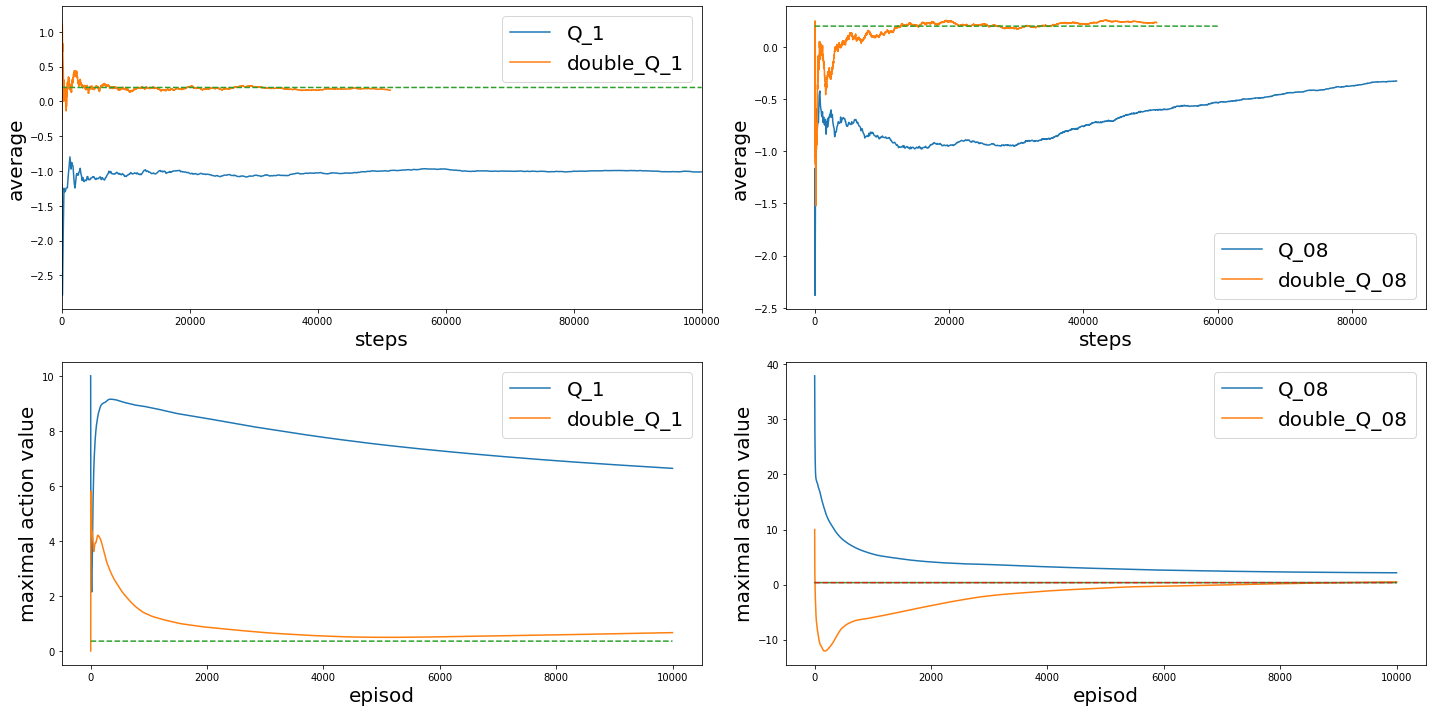

In [15]:
steps_Q1=[]
average_Q1=[]
for i in range(len(av_Q)):
    steps_Q1.append(av_Q[i][0])
    average_Q1.append(av_Q[i][1])
    
steps_2Q1=[]
average_2Q1=[]
for i in range(len(av_2Q)):
    steps_2Q1.append(av_2Q[i][0])
    average_2Q1.append(av_2Q[i][1])
    
steps_Q08=[]
average_Q08=[]
for i in range(len(av_Q_08)):
    steps_Q08.append(av_Q_08[i][0])
    average_Q08.append(av_Q_08[i][1])
    
steps_2Q08=[]
average_2Q08=[]
for i in range(len(av_2Q_08)):
    steps_2Q08.append(av_2Q_08[i][0])
    average_2Q08.append(av_2Q_08[i][1])

fig=plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.xlabel("steps",fontsize=20)
plt.ylabel("average",fontsize=20)
plt.xlim(0, 100000)
plt.plot(steps_Q1,average_Q1,label='Q_1')
plt.plot(steps_2Q1,average_2Q1,label='double_Q_1')
a=[0.2 for i in range(1000000)]
plt.plot(a,label='+0.2','--')
plt.legend(fontsize=20)

plt.subplot(2,2,2)
plt.xlabel("steps",fontsize=20)
plt.ylabel("average",fontsize=20)
#plt.ylim(-1, 1)
plt.plot(steps_Q08,average_Q08,label='Q_08')
plt.plot(steps_2Q08,average_2Q08,label='double_Q_08')
a=[0.2 for i in range(60000)]
plt.plot(a,label='+0.2','--')
plt.legend(fontsize=20)

plt.subplot(2,2,3)
plt.xlabel("episod",fontsize=20)
plt.ylabel("maximal action value",fontsize=20)
plt.plot(Q_max_Q,label='Q_1')
plt.plot(Q_max_2Q,label='double_Q_1')
a=[0.36 for i in range(10000)]
plt.plot(a,label='+0.36','--')
plt.legend(fontsize=20)
plt.subplot(2,2,4)
plt.xlabel("episod",fontsize=20)
plt.ylabel("maximal action value",fontsize=20)
plt.plot(Q_max_Q_08,label='Q_08')
plt.plot(Q_max_2Q_08,label='double_Q_08')
plt.plot(a)
a=[0.36 for i in range(10000)]
plt.plot(a,label='+0.36','--')

plt.legend(fontsize=20)
fig.tight_layout()

Answer the following questions:

a.	Which algorithm finds a better policy? Why?
> Answer double_Q, because it skipes Maximum Bias and find the optimal policy very fast.
 
b.	b.	Which learning rate performs better? 
> Answer the secound one. when the power of denominator of alpha is 0.8 in comparison to 1, the alpha will be grater in same condition. so for the grater alpha action_values can change faster so the algorithm can find the optimal value faster and the chance for trap is less.